<a href="https://colab.research.google.com/github/Debanjan-C/WANG-690-FALL-2020/blob/master/690_Project/Deliverable_2/Project__D2_690.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data 690 Deliverable 2

**Debanjan Chowdhury**

## Project Background and Details: 
This project is based on **individuals in the US** who have healthcare insurance and we are evaluating 
which individuals are paying a higher premium price and which ones are paying a lower one. Some individuals
may be **smokers**, may have **more children** than others, may live in **specific regions** that are hotter than others,
and many more. Therefore, our intentions are to evaluate *what possible features* may play a role in evaluating
the premium prices of each of the individuals. We will be using different techniques like data cleaning, visualization,
EDA to find out the factors that may influence the premium charges. 


## Details about the Dataset inspirations
I received a dataset from Kaggle that has the dataset of individuals
that live in different regions of the US, are of all types of ages
ranging from **20 - 60 years of age**, etc.  The dataset is retreived from the following
link:**https://www.kaggle.com/mirichoi0218/insurance**


## Step 1 - Set Up Environment

### 1.1 - Install Seaborn 

 - Seaborn is a **visualization library**
 - It can be used for developing different visualization charts like *bar chart, line chart, etc*.

In [ ]:
pip install seaborn

You should consider upgrading via the '/opt/venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


### Install Plotly
 - Plotly is an **interactive visualization library**
 - It can be used for developing different visualization charts.
 - More **importantly** it can be used to interact with the visualization charts. Like you can **hover** or *place your mouse over* a specific data to see all information.

In [ ]:
pip install plotly

You should consider upgrading via the '/opt/venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


### 1.2 - Import pandas, matplotlib, plotly and seaborn

- We are importing all of the *potenital libraries* that 
we would need down the line for the project. 
- Those are 
    - **matplotlib (visualization)** 
    - **pandas (reading data and generating dataframes)**
    - **seaborn (visualiztions used for distribution charts in this project)**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Step 2. Read the Data 
- We will **read the data** from a csv file. The dataset has **7 columns** and **1338 rows**.
- We will use *Pandas to read the csv file* and convert it to a **dataframe**.  
- There are *7 features* in the dataset that may play a role in describing the dataset further. 

In [ ]:
df = pd.read_csv("insurance.csv")
df.shape

(1338, 7)

### 2.1 - First five rows 
- We do this to get an idea of the dataset and how it looks. 
- This is the **first five rows** in our dataset. 

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### 2.2 - Last five rows 
- We do this to get an idea of the dataset and how it looks. 
- This is **the last five rows** in our dataset. 

In [ ]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


### 2.3 - Column dataset
As we can see we have the columns of age, sex, bmi, 
number of children, whether the user is a smoker or not, 
the regions and the charges of the insurance premium.

**Column details: **
- age :- This shows the *age of each of the individuals*
that are taken to calculate the insurance charges. 
- bmi :- The overall *body mass index* of each of the individuals
- sex :- The *gender* of each of the individuals.
- children :- *Number of children* each individual has.
- smoker :- A value that checks if an *individual smokes or not*. 
- region :- The *region in the US* where an individual may live -
 *(Northwest, Southwest, Northeast, Southeast)*
- charges :- The *insurance premium prices* that each individual
may have to pay. 

In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

### 2.4 - Overall dataset information
- This shows us the row and column count along with all the *features, column data type and all other info*

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### 2.5 - Summary Statistics
This will show us the *count, average, standard devation and all statistical details* of the numeric columns. 

In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Step 3 - Check and Cleanse Data 
- We check if we have **columns with null values in them**. 
    - If we do then we can delete those.
- We have **no null values** in the entire dataset. 
     - So, we have all values ***accounted for***.

In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Step 3.1 - Renaming Column
**I renamed the sex column to gender to make it easier.** 

In [ ]:
df = df.rename(columns=({'sex':'gender'}))
df.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Step 4 - Analyzing relationship with columns and premium
- We check for the relationship between our **important features or columns**
 and the premium insurance to evaluate what possibly causes 
 **higher or lower premium charges**

### Step 4.1 - Check for the unique datas
- We check for *unique values* inside the region row

In [ ]:
df["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

### Step 4.2 - Aggregate Data and check realtionships with premium charge
- We find the **average insurance premium charges** with respect to the columns like region, age, number of children and all to see who has an *overall higher premium*.

**1st Research Question** - How are the overall premium charges
affected in respect to the regions that an individual lives in?

In [ ]:
##We aggregate average charges for each value in the region column. 
region_df = df[["region","charges"]].groupby('region').agg(
    Mean_charges=pd.NamedAgg("charges", "mean") 
)
region_df = region_df.reset_index()
region_df.head()

,region,Mean_charges
0,northeast,13406.384516
1,northwest,12417.575374
2,southeast,14735.411438
3,southwest,12346.937377


<AxesSubplot:xlabel='region'>

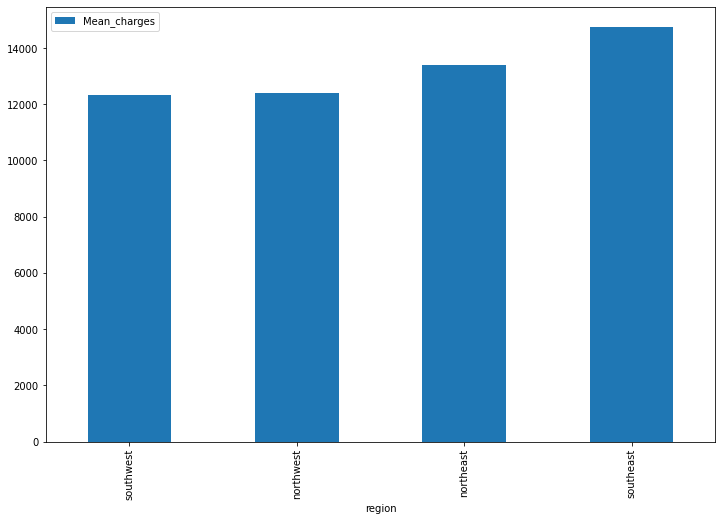

In [ ]:
"""
Visualization of the aggregation of the premium charges with respect to the region
As we can see individuals in the SouthEast have a higher charge.
"""
region_df.sort_values(by="Mean_charges").plot.bar(
    x="region", 
    y="Mean_charges",
    figsize=(12,8)
)

- As we can see in the visualization above, individuals
who live in the Southeast region of the United States seem to be
paying a higher overall premium with respect to individuals in
all other regions.

**2nd Research Question** - How are the overall premium charges
affected in respect to whether an individual smokes or not?

In [ ]:
"""
We aggregate average charges for each value in the smoker column to see 
if smokers or non smokers have higher charges. 
"""
smoker_df = df[["smoker","charges"]].groupby('smoker').agg(
    Mean_charges=pd.NamedAgg("charges", "mean") 
)
smoker_df = smoker_df.reset_index()
smoker_df.head()

,smoker,Mean_charges
0,no,8434.268298
1,yes,32050.231832


<AxesSubplot:xlabel='smoker'>

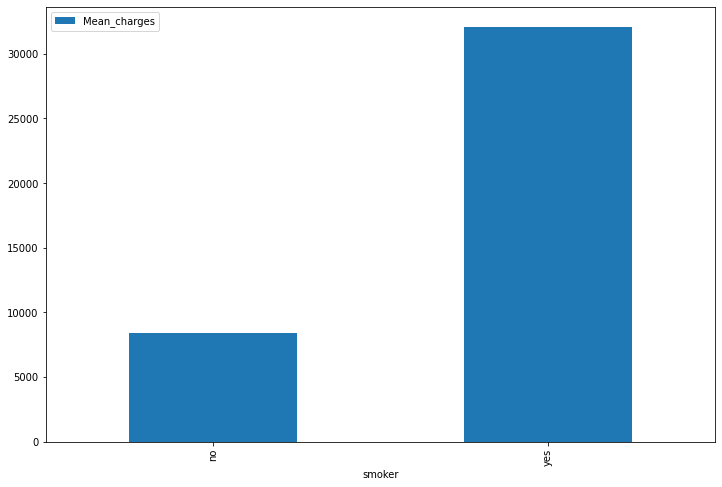

In [ ]:
"""
Visualization of the aggregation of the premium charges with respect to smokers
As we can see those who smoke tend to have a higher charge.
"""
smoker_df.sort_values(by="Mean_charges").plot.bar(
    x="smoker", 
    y="Mean_charges",
    figsize=(12,8)
)

- As we can see in the visualization above, individuals
who are smokers would be paying a higher overall premium than 
the non-smokers. 

**3rd Research Question** - How are the overall premium charges
affected in respect to the number of childrens each of the
individuals have?

In [ ]:
"""
We aggregate average charges for each value in the column showing 
the number of childrens for each user. 
"""
children_df = df[["children","charges"]].groupby('children').agg(
    Mean_charges=pd.NamedAgg("charges", "mean") 
)
children_df = children_df.reset_index()
children_df.head()

,children,Mean_charges
0,0,12365.975602
1,1,12731.171832
2,2,15073.563734
3,3,15355.318367
4,4,13850.656311


<AxesSubplot:xlabel='children'>

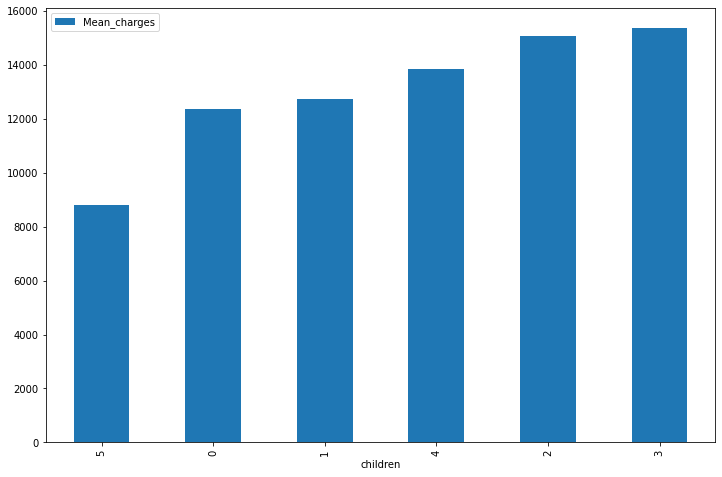

In [ ]:
"""
Visualization of the aggregation of the premium charges with respect to 
how many children each individual has. As we can see those who have
about 5 children seem to be paying the least.
"""
children_df.sort_values(by="Mean_charges").plot.bar(
    x="children", 
    y="Mean_charges",
    figsize=(12,8)
)

- As we can see in the visualization above, those who have about 5
children seem to have the least amount of premium and then it goes up by the
number oof children you have, but as one would expect those who have 
four or five children are not in the **top two highest** categories of
premium charges. 

**4th Research Question** - How are the overall premium charges
affected in respect to the gender of each individual?

In [ ]:
"""
We aggregate average charges for each value in the column showing 
the sex or gender for each of the users. 
"""
gender_df = df[["gender","charges"]].groupby('gender').agg(
    Mean_charges=pd.NamedAgg("charges", "mean") 
)
gender_df = gender_df.reset_index()
gender_df.head()

,gender,Mean_charges
0,female,12569.578844
1,male,13956.751178


<AxesSubplot:xlabel='gender'>

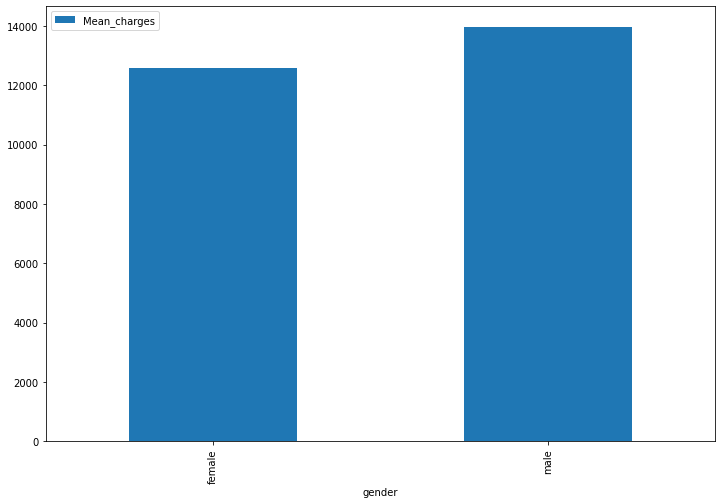

In [ ]:
"""
Visualization of the aggregation of the premium charges 
with respect to the sex or gender of each individual. As we can
see, males seem to have a higher premium charge..
"""
gender_df.sort_values(by="Mean_charges").plot.bar(
    x="gender", 
    y="Mean_charges",
    figsize=(12,8)
)

- As we can see in the visualization above, *males* seem to have a slightly
higher overall charge than *females* in the dataset. 

## Step 5 - Analyzing relationship of charges with age and BMI
- We plan in looking into the **age** of an individual and personal
health details like the BMI or **Body Mass Index** to understand how
they both play a role in determining how **overall age and health**
would play a factor in analyzing the premium charges of the 
individual who is looking for insurance. 

## Step 5.1.1 - Distribution plots for age
- We would be evaluating the distribution or seeing the number
of individuals in a specific category. 
- Below we are finding the Distrbution of the individuals of sepcific age.

In [ ]:
## Find out how many unique ages are in the dataset.

df["age"].unique()

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39])

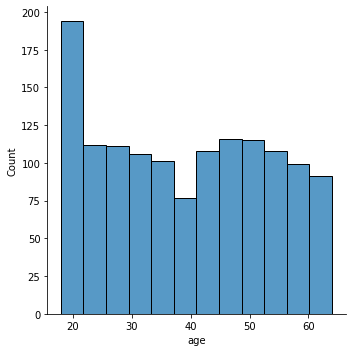

In [ ]:
"""
Below is a distribution of the ages of individuals in the dataset
and we can see which age has more occurence and which has lower
occurence.
"""

sns.displot(df, x="age")

- As we can see in the visualization above, the individuals who are
maybe in **late teens and in their early 20's** have a significantly
*higher occurence* than the others. 

## Step 5.1.2 - Distribution plots for BMI
- We would be evaluating the distribution or seeing the number
of individuals in a specific category. 
- Below we are finding the Distrbution of the individuals of sepcific BMI scores.

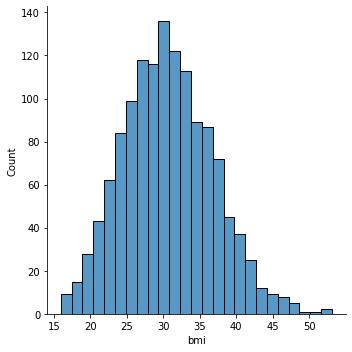

In [ ]:
sns.displot(df, x="bmi")

- As we can see in the visualization above, the individuals who may
have a **BMI score between 30-35** seem to be in a higher occurence than
the rest. Those who have a **BMI score of 50** seem to be in the least
occurence.

### Step 5.2 - Aggregate average BMI data and average charges
- We find the **average insurance premium charges** and **average
BMI data** for individuals of a specific age and we would be
evaluating how the BMI, age and the insurance charges are related. 

**Research Question** - How are the premium charges of individuals calculated when
we take their age adn the Body Mass Index into consideration? Will those 
who are younger and have a higher BMI pay less or would those who are older with a higher BMI 
pay a higher premium? or would those who have a lower BMI pay higher?

In [ ]:
"""
We use aggregates for average charges and BMI. We will be calculating
the mean BMI and mean charges of individuals of each age.
"""
df2 = df[["age", "bmi","charges"]].groupby('age').agg(
    Mean_BMI=pd.NamedAgg("bmi", "mean"),
    Mean_Insurance_Charges=pd.NamedAgg("charges", "mean")
)
df2 = df2.reset_index()
df2.head()

,age,Mean_BMI,Mean_Insurance_Charges
0,18,31.326159,7086.217556
1,19,28.596912,9747.909335
2,20,30.632759,10159.697736
3,21,28.185714,4730.464330
4,22,31.087679,10012.932802


In [ ]:
"""
We rounded each of the mean values to two decimal places to
keep the data in a simpler format and easier to understand.
"""
df2 = df2.round(2)
df2.head()

,age,Mean_BMI,Mean_Insurance_Charges
0,18,31.33,7086.22
1,19,28.60,9747.91
2,20,30.63,10159.70
3,21,28.19,4730.46
4,22,31.09,10012.93


<AxesSubplot:xlabel='age'>

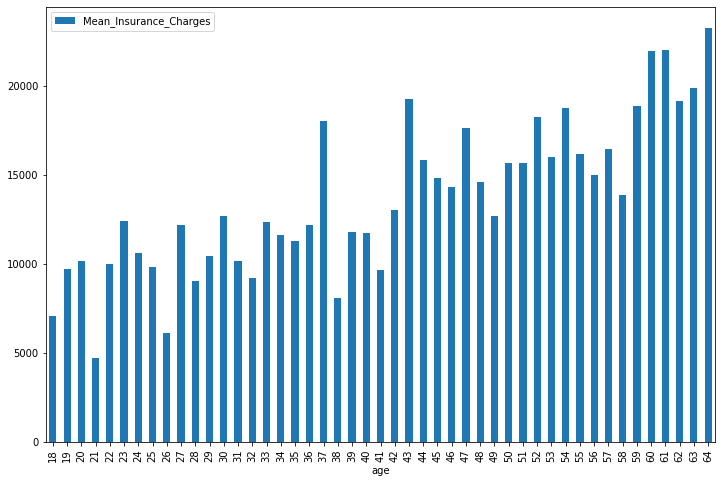

In [ ]:
"""
Visualization of the aggregation of the premium charges 
with respect to the age of the individuals.
"""
df2.sort_values(by="age").plot.bar(
    x="age", 
    y="Mean_Insurance_Charges",
    figsize=(12,8)
)

- In the visualization above, we can see that in most cases 
**younger individuals around 20's and 30's** seem to be paying 
a significantly lower premiuim charge than 
**realtively older individuals** that may be paying a higher charge.  

<AxesSubplot:xlabel='age'>

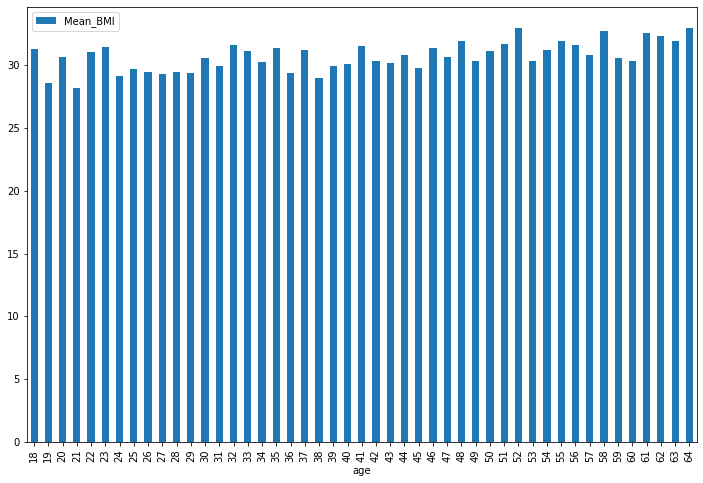

In [ ]:
"""
Visualization of the aggregation of the BMI scores
with respect to the age of the individuals.
"""
df2.sort_values(by="age").plot.bar(
    x="age",
    y="Mean_BMI",
    figsize=(12,8)
)

- As we can see in the visualization above, **the age may not play
as much of a factor in determining the BMI scores**. 

We want to evaluate if there is a possible relationship between
the insurance cahrges and the BMI of an individual and we also see
the *age of the individual (by hovering over the dots)* to see how that could play a role.

In [ ]:
pd.options.plotting.backend = "plotly"

df2.plot.scatter(x="Mean_BMI", y="Mean_Insurance_Charges",  hover_data=["age"])

- According to the visualization above, we can see that as the
**BMI of an individual would be rising** then the **insurance charges
also increase** along with it. 
- If we take a look at the smallest calculation *(the plot in bottom left most)*. 
If we hover over the point the age of the individual is 18 years old,
his BMI is between 28-29 and his charge is below 5000. 
- When we see the largest dataset *(the plot on the top left)*
then we can see that the individual is 64 when we hover over the data point 
and insurance price is around 33k and BMI is close to 38.

**Therefore, from my observations here I can notice that BMI
may play a role with the prices, but it is the age that plays a bigger
role when it comes to determining the premium charges.**